### PUNTO 1
# Optimización en 2 dimensiones: gradiente descendiente

En esta sección, trabajaremos con la función de Rosenbrock en dos dimensiones. 
su MIN_GLOBAL_ROSENBROCK = (1,1)   (en este caso)

**OBJETIVO:** emplear el método de optimización de gradiente descendente evaluando su desempeño al encontrar el minimo de la función

In [267]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

In [268]:
def rosenbrock(x, y, a=1, b=100):
    return (a - x)**2 + b * (y - x**2)**2

def grad_rosenbrock(x, y, a=1, b=100):
    dfdx = -2 * (a - x) - 4 * b * x * (y - x**2)
    dfdy = 2 * b * (y - x**2)
    return np.array([dfdx, dfdy])

Visualización de la función:

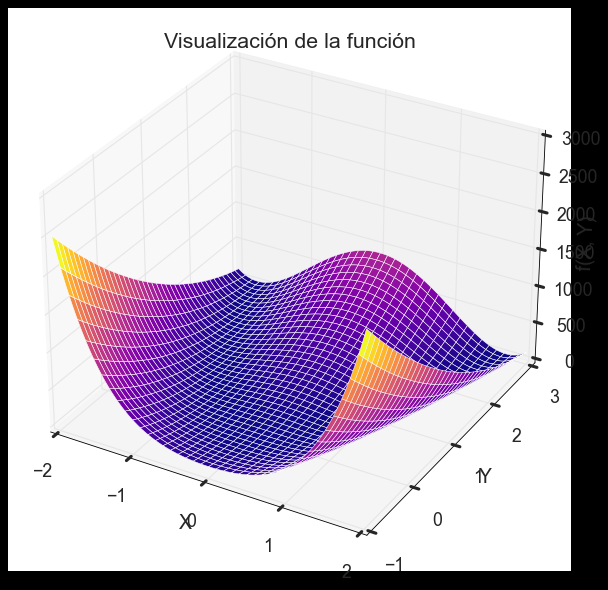

In [269]:
x = np.linspace(-2, 2, 400)
y = np.linspace(-1, 3, 400)
X, Y = np.meshgrid(x, y)
Z = rosenbrock(X, Y)

fig = plt.figure()
plt.style.use('seaborn-v0_8-white') #style :)
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='plasma')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(X, Y)')
ax.set_title('Visualización de la función')
plt.show()

#### GRADIENTE DESCENDIENTE:
1) Implementar el algoritmo de gradiente descendente para minimizar f
2) Probar diferentes tasas de aprendizaje (η o learning rates) para observar su impacto en la convergencia


    ##### ANÁLISIS:

    - efecto de η (learning rates)
    
    - sensibilidad de los métodos a las condiciones iniciales (CI)
        ###### probando múltiples valores iniciales (x0, y0), evaluando y visualizando algunas trayectorias en el plano (x, y) representativas
    - rapidez y #iteraciones
        ###### La rapidez con la que se alcanza el mínimo global, y el número de iteraciones requeridas para alcanzar una tolerancia fija ∥∇f (x, y)∥ < ε.
        

In [270]:
def gradient_descent(f, grad_f, start, learning_rate, tol=1e-4, max_iter=50000, a=1, b=100):
    x = np.array(start, dtype=float)
    trajectory = [x.copy()]
    eta = learning_rate  # a explorar
    prev_value = f(x[0], x[1], a, b)

    for i in range(max_iter):
        grad = grad_f(x[0], x[1], a, b)
        grad_norm = np.linalg.norm(grad) 

        x -= eta * grad
        trajectory.append(x.copy())

        # CONVERGENCIA
        if grad_norm < tol:
            print(f"Convergencia alcanzada en {i + 1} iteraciones. Tasa de aprendizaje final: {eta:.5f}")
            return x, np.array(trajectory)

    print("No se alcanzó la convergencia en el número máximo de iteraciones.")
    return x, np.array(trajectory)


In [271]:
def gradient_descent2(f, grad_f, start, learning_rate, tol=1e-4, max_iter=50000, a=1, b=100):
    x = np.array(start, dtype=float)
    trajectory = [x.copy()]
    eta = learning_rate  # a explorar
    prev_value = f(x[0], x[1], a, b)

    for i in range(max_iter):
        grad = grad_f(x[0], x[1], a, b)
        grad_norm = np.linalg.norm(grad) 

        #PARA QUE NO SE SALTEE EL MÍNIMO
        # limito el tamaño del gradiente para evitar explosiones
        if grad_norm > 1e4:
            grad = grad / grad_norm * 1e4


        x -= eta * grad
        trajectory.append(x.copy())

        current_value = f(x[0], x[1], a, b)
        # Si el valor aumenta, reduce la tasa de aprendizaje
        if current_value > prev_value:
            eta *= 0.5
            print(f"Tasa de aprendizaje reducida a {eta:.5e} en iteración {i}.")
        prev_value = current_value

        # CONVERGENCIA
        if grad_norm < tol:
            print(f"Convergencia alcanzada en {i + 1} iteraciones. Tasa de aprendizaje final: {eta:.5f}")
            return x, np.array(trajectory)

    print("No se alcanzó la convergencia en el número máximo de iteraciones.")
    return x, np.array(trajectory)


In [272]:
def plot_trajectory2(trajectory, a=1, b=100,title="Trayectoria"):

    plt.style.use('Solarize_Light2') #style :)
    
    x = np.linspace(-2, 2, 400)
    y = np.linspace(-1, 3, 400)
    X, Y = np.meshgrid(x, y)
    Z = rosenbrock(X, Y, a, b)

    #POSIBLES COLORES: plasma, PiYG, twilight, twilight_reverse
    plt.figure(figsize=(12, 8))
    contour = plt.contourf(X, Y, Z, levels=50, cmap="plasma", alpha=0.85)
    cbar = plt.colorbar(contour)
    cbar.set_label("Valor de $f(x, y)$", fontsize=12)

    #TRAYECTORIA
    plt.plot(trajectory[:, 0], trajectory[:, 1], 'w.-', linewidth=2, markersize=8, label="Trayectoria")
    
    #F0 Ff
    plt.scatter(trajectory[0, 0], trajectory[0, 1], color='cyan', edgecolor='black', s=100, label="Inicio")
    plt.annotate("Inicio", (trajectory[0, 0], trajectory[0, 1]), textcoords="offset points", xytext=(-30, 10), fontsize=10, color="cyan", ha="center")
    
    plt.scatter(trajectory[-1, 0], trajectory[-1, 1], color='orange', edgecolor='black', s=100, label="Final")
    plt.annotate("Final", (trajectory[-1, 0], trajectory[-1, 1]), textcoords="offset points", xytext=(30, -10), fontsize=10, color="orange", ha="center")
    
    plt.title(title, fontsize=14, fontweight='bold')
    plt.xlabel("$x$", fontsize=12)
    plt.ylabel("$y$", fontsize=12)
    

    #plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
    #plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
    
    plt.legend(loc="upper left", fontsize=20)
    

    plt.tight_layout()
    plt.show()

def move_along_contour(grad_f, start, learning_rate=0.01, tol=1e-8, max_iter=500):
    """
    Método para moverse a lo largo de las curvas de nivel de una función.
    """
    x = np.array(start, dtype=float)
    trajectory = [x.copy()]
    
    for i in range(max_iter):
        grad = grad_f(x[0], x[1])
        grad_norm = np.linalg.norm(grad)
        
        # Verifica si el gradiente es demasiado pequeño
        if grad_norm < tol:
            print(f"Convergencia alcanzada en {i + 1} iteraciones.")
            break
        
        # Direccion ortogonal al gradiente (aproximadamente tangente a la curva de nivel)
        tangential_dir = np.array([-grad[1], grad[0]]) / grad_norm

        # Actualización en la dirección tangencial
        x += learning_rate * tangential_dir
        trajectory.append(x.copy())
    else:
        print("No se alcanzó la convergencia en el número máximo de iteraciones.")
    
    return x, np.array(trajectory)    

def plot_trajectory(trajectory, title="Trayectoria"):
    plt.style.use('seaborn-v0_8') #style :) bmh
    x_vals = trajectory[:, 0]
    y_vals = trajectory[:, 1]
    x = np.linspace(-2, 2, 400)
    y = np.linspace(-1, 3, 400)
    X, Y = np.meshgrid(x, y)
    Z = rosenbrock(X, Y)

    plt.figure(figsize=(10, 6))
    plt.contour(X, Y, Z, levels=np.logspace(-0.5, 3.5, 20), cmap="Blues_r")
    plt.plot(x_vals, y_vals, 'r.-', color="#FB670A",label="Movimiento a lo largo de curvas de nivel")
    plt.scatter([trajectory[0, 0]], [trajectory[0, 1]], color="blue", label="Inicio")
    plt.scatter([trajectory[-1, 0]], [trajectory[-1, 1]], color="purple", label="Final")
    plt.scatter([1], [1], color="black", label="Mínimo")
    plt.xlabel("$x$")
    plt.ylabel("$y$")
    plt.title(title)
    plt.legend()
    plt.grid(False)
    plt.show()
  

In [273]:
start = [-1.5, 2.0]
learning_rates = [0.0001, 0.001, 0.01, 0.1]

for lr in learning_rates:
    print(f"\nProbando tasa de aprendizaje: {lr}")
    min_point, trajectory = gradient_descent(rosenbrock, grad_rosenbrock, start, lr)
    print(f"Punto mínimo encontrado: {min_point}")

#GALERAZO
def optimal_learning_rate(a=1, b=100):
    # La tasa de aprendizaje óptima para la función de Rosenbrock se puede aproximar como 1 / (4 * b)
    return 1 / (4 * b)

optimal_lr = optimal_learning_rate()
print(f"\nTasa de aprendizaje óptima calculada: {optimal_lr}")


min_point, trajectory = gradient_descent(rosenbrock, grad_rosenbrock, start, optimal_lr)
print(f"Punto mínimo encontrado con la tasa de aprendizaje óptima: {min_point}")


Probando tasa de aprendizaje: 0.0001
No se alcanzó la convergencia en el número máximo de iteraciones.
Punto mínimo encontrado: [0.91913311 0.84446604]

Probando tasa de aprendizaje: 0.001
Convergencia alcanzada en 21162 iteraciones. Tasa de aprendizaje final: 0.00100
Punto mínimo encontrado: [0.99988829 0.99977614]

Probando tasa de aprendizaje: 0.01


/var/folders/j1/r60xxb3967n8vkrdq5glrgzw0000gn/T/ipykernel_17330/1325698494.py:5: RuntimeWarning: overflow encountered in scalar power
  dfdx = -2 * (a - x) - 4 * b * x * (y - x**2)
/var/folders/j1/r60xxb3967n8vkrdq5glrgzw0000gn/T/ipykernel_17330/1325698494.py:6: RuntimeWarning: overflow encountered in scalar power
  dfdy = 2 * b * (y - x**2)
/var/folders/j1/r60xxb3967n8vkrdq5glrgzw0000gn/T/ipykernel_17330/1325698494.py:5: RuntimeWarning: invalid value encountered in scalar subtract
  dfdx = -2 * (a - x) - 4 * b * x * (y - x**2)
/var/folders/j1/r60xxb3967n8vkrdq5glrgzw0000gn/T/ipykernel_17330/1325698494.py:6: RuntimeWarning: invalid value encountered in scalar subtract
  dfdy = 2 * b * (y - x**2)


No se alcanzó la convergencia en el número máximo de iteraciones.
Punto mínimo encontrado: [nan nan]

Probando tasa de aprendizaje: 0.1
No se alcanzó la convergencia en el número máximo de iteraciones.
Punto mínimo encontrado: [nan nan]

Tasa de aprendizaje óptima calculada: 0.0025
No se alcanzó la convergencia en el número máximo de iteraciones.
Punto mínimo encontrado con la tasa de aprendizaje óptima: [nan nan]


/var/folders/j1/r60xxb3967n8vkrdq5glrgzw0000gn/T/ipykernel_17330/1325698494.py:5: RuntimeWarning: overflow encountered in scalar multiply
  dfdx = -2 * (a - x) - 4 * b * x * (y - x**2)
/var/folders/j1/r60xxb3967n8vkrdq5glrgzw0000gn/T/ipykernel_17330/2699541909.py:11: RuntimeWarning: invalid value encountered in subtract
  x -= eta * grad


No se alcanzó la convergencia en el número máximo de iteraciones.


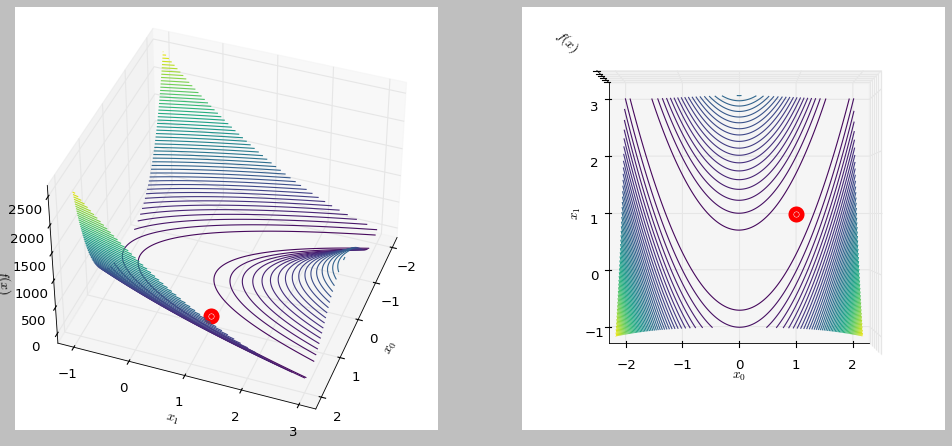

In [287]:
start_point = [-1.2, 1]
learning_rate = 0.001

# Ejecutar el descenso de gradiente
final_point, trajectory = gradient_descent(rosenbrock, grad_rosenbrock, start_point, learning_rate)

# Preparar la función objetivo entre -2 y 2
x = np.linspace(-2, 2, 400)
y = np.linspace(-1, 3, 400)
X, Y = np.meshgrid(x, y)
Z = rosenbrock(X, Y)

# Minimizer
min_x0, min_x1 = np.meshgrid(final_point[0], final_point[1])   
min_z = rosenbrock(min_x0, min_x1)

# Plot
fig = plt.figure(figsize=(15, 20))

# First subplot
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.contour3D(X, Y, Z, 60, cmap='viridis')
ax.scatter(min_x0, min_x1, min_z, marker='o', color='red', linewidth=10)
ax.set_xlabel('$x_{0}$')
ax.set_ylabel('$x_{1}$')
ax.set_zlabel('$f(x)$')
ax.view_init(40, 20)

# Second subplot
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.contour3D(X, Y, Z, 60, cmap='viridis')
ax.scatter(min_x0, min_x1, min_z, marker='o', color='red', linewidth=10)
ax.set_xlabel('$x_{0}$')
ax.set_ylabel('$x_{1}$')
ax.set_zlabel('$f(x)$')
ax.axes.zaxis.set_ticklabels([])
ax.view_init(90, -90)

plt.show()


Tasa de aprendizaje: 0.001
Convergencia alcanzada en 20549 iteraciones. Tasa de aprendizaje final: 0.00100
Punto final estimado: [0.99988828 0.99977613]
Valor de la función en el punto final: 1.2501165920026068e-08


/var/folders/j1/r60xxb3967n8vkrdq5glrgzw0000gn/T/ipykernel_17330/541583525.py:78: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r.-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_vals, y_vals, 'r.-', color="#FB670A",label="Movimiento a lo largo de curvas de nivel")


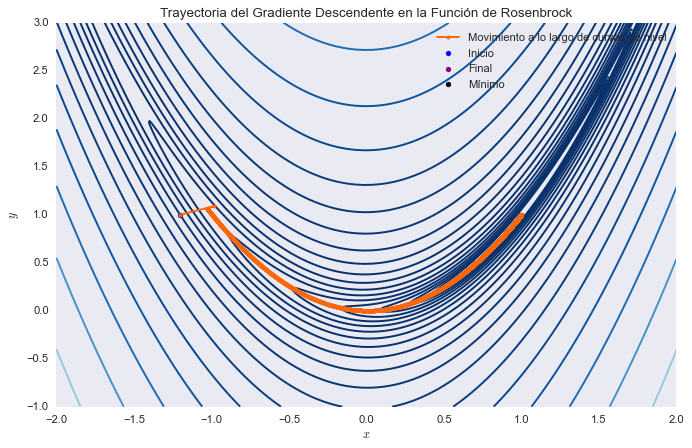


Tasa de aprendizaje: 0.001


/var/folders/j1/r60xxb3967n8vkrdq5glrgzw0000gn/T/ipykernel_17330/541583525.py:78: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r.-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_vals, y_vals, 'r.-', color="#FB670A",label="Movimiento a lo largo de curvas de nivel")


Convergencia alcanzada en 23085 iteraciones. Tasa de aprendizaje final: 0.00100
Punto final estimado: [1.00011174 1.00022394]
Valor de la función en el punto final: 1.250563965538774e-08


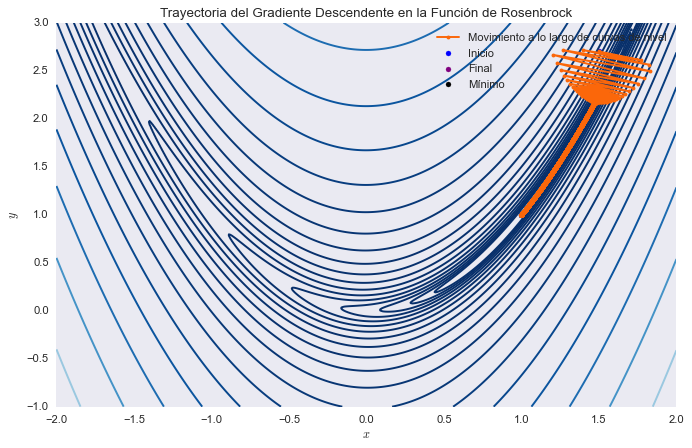


Tasa de aprendizaje: 0.001
Convergencia alcanzada en 19778 iteraciones. Tasa de aprendizaje final: 0.00100
Punto final estimado: [0.99988829 0.99977615]
Valor de la función en el punto final: 1.2498179314066064e-08


/var/folders/j1/r60xxb3967n8vkrdq5glrgzw0000gn/T/ipykernel_17330/541583525.py:78: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r.-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_vals, y_vals, 'r.-', color="#FB670A",label="Movimiento a lo largo de curvas de nivel")


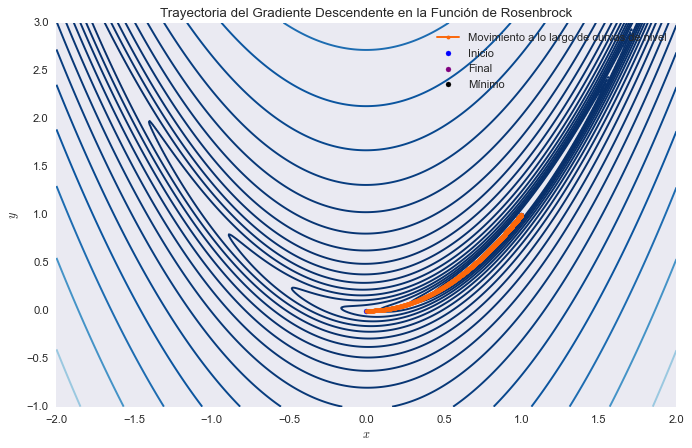


Tasa de aprendizaje: 0.001
Convergencia alcanzada en 19704 iteraciones. Tasa de aprendizaje final: 0.00100
Punto final estimado: [0.99988828 0.99977613]
Valor de la función en el punto final: 1.250051603616187e-08


/var/folders/j1/r60xxb3967n8vkrdq5glrgzw0000gn/T/ipykernel_17330/541583525.py:78: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r.-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_vals, y_vals, 'r.-', color="#FB670A",label="Movimiento a lo largo de curvas de nivel")


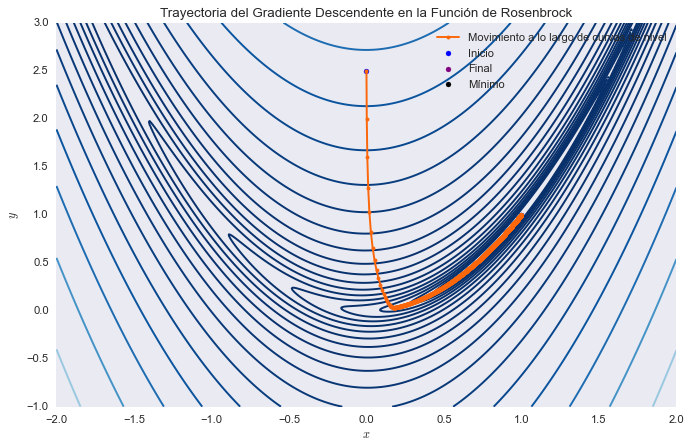


Tasa de aprendizaje: 0.001
Convergencia alcanzada en 19713 iteraciones. Tasa de aprendizaje final: 0.00100
Punto final estimado: [0.99988829 0.99977615]
Valor de la función en el punto final: 1.2498602181333485e-08


/var/folders/j1/r60xxb3967n8vkrdq5glrgzw0000gn/T/ipykernel_17330/541583525.py:78: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r.-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_vals, y_vals, 'r.-', color="#FB670A",label="Movimiento a lo largo de curvas de nivel")


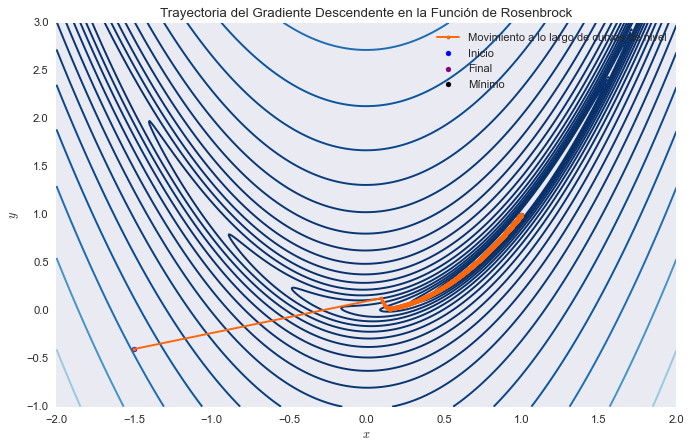


Tasa de aprendizaje: 0.001
Convergencia alcanzada en 20744 iteraciones. Tasa de aprendizaje final: 0.00100
Punto final estimado: [1.00011175 1.00022397]
Valor de la función en el punto final: 1.2508843833464842e-08


/var/folders/j1/r60xxb3967n8vkrdq5glrgzw0000gn/T/ipykernel_17330/541583525.py:78: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r.-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_vals, y_vals, 'r.-', color="#FB670A",label="Movimiento a lo largo de curvas de nivel")


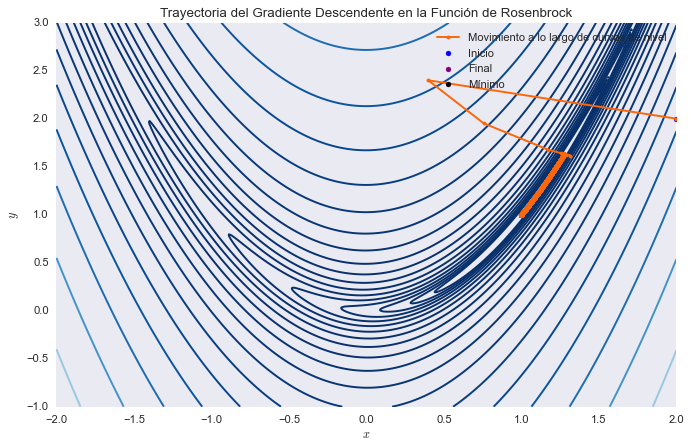


Tasa de aprendizaje: 0.001
Convergencia alcanzada en 19021 iteraciones. Tasa de aprendizaje final: 0.00100
Punto final estimado: [0.99988827 0.9997761 ]
Valor de la función en el punto final: 1.250372369175277e-08


/var/folders/j1/r60xxb3967n8vkrdq5glrgzw0000gn/T/ipykernel_17330/541583525.py:78: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r.-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_vals, y_vals, 'r.-', color="#FB670A",label="Movimiento a lo largo de curvas de nivel")


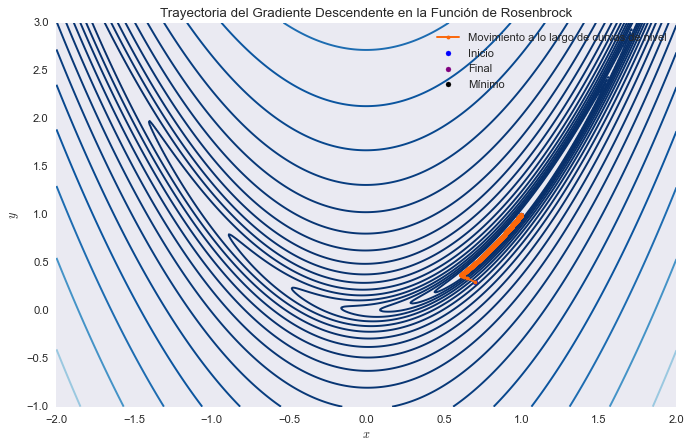

In [274]:
#ACÁ SOLO PRUEBO CON S_{k}=0.01, HAY QUE PROBAR MÁS O VER CÓMO ELEGIR

start_point = [(-1.2, 1), (1.5,2.7), (0,0), (0,2.5), (-1.5,-0.4),(2,2), (0.7,0.3)]  #CI
learning_rates = [0.001, 0.01, 0.1, 1]  #S_{k}

for s_p in start_point:
    print(f"\nTasa de aprendizaje: {0.001}")
    final_point, trajectory = gradient_descent(rosenbrock, grad_rosenbrock, s_p, learning_rate=0.001)
    print(f"Punto final estimado: {final_point}")
    print(f"Valor de la función en el punto final: {rosenbrock(final_point[0], final_point[1])}")
    plot_trajectory(trajectory, title="Trayectoria del Gradiente Descendente en la Función de Rosenbrock")


Tasa de aprendizaje: 0.001
No se alcanzó la convergencia en el número máximo de iteraciones.
Punto final estimado: [0.99235584 0.98473938]
Valor de la función en el punto final: 5.852760790128446e-05

Tasa de aprendizaje: 0.001
Tasa de aprendizaje reducida a 5.00000e-04 en iteración 0.
No se alcanzó la convergencia en el número máximo de iteraciones.
Punto final estimado: [1.19539354 1.42966142]
Valor de la función en el punto final: 0.03822703603870246

Tasa de aprendizaje: 0.001
No se alcanzó la convergencia en el número máximo de iteraciones.
Punto final estimado: [0.99440095 0.98881076]
Valor de la función en el punto final: 3.139992492505519e-05

Tasa de aprendizaje: 0.001
No se alcanzó la convergencia en el número máximo de iteraciones.
Punto final estimado: [0.99456494 0.9891376 ]
Valor de la función en el punto final: 2.958751146572048e-05

Tasa de aprendizaje: 0.001
No se alcanzó la convergencia en el número máximo de iteraciones.
Punto final estimado: [0.99454561 0.98909908]

/var/folders/j1/r60xxb3967n8vkrdq5glrgzw0000gn/T/ipykernel_17330/2594791081.py:63: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r.-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_vals, y_vals, 'r.-', color=colors[i % len(colors)], label=f"Inicio {i+1}")


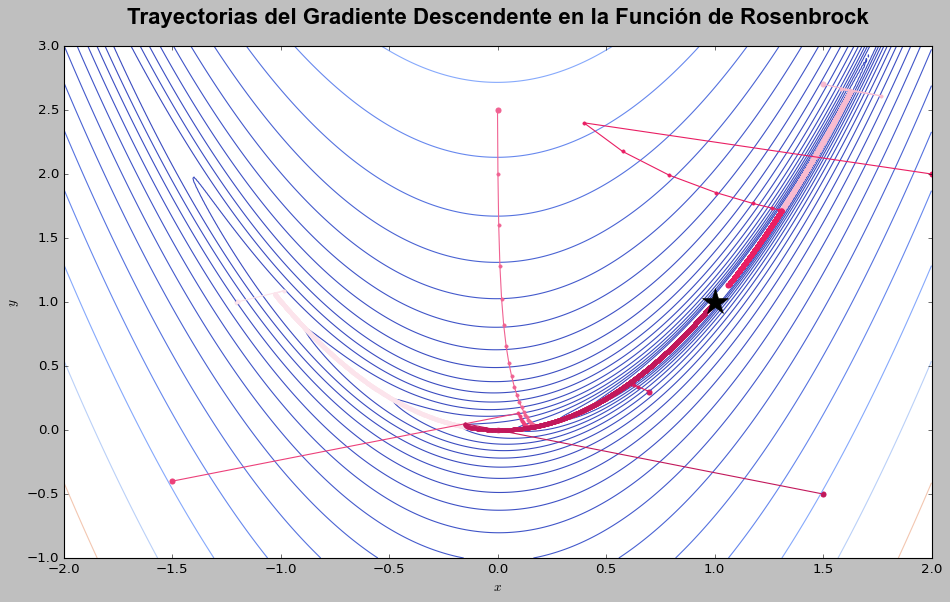

In [286]:
def gradient_descent(f, grad_f, start, learning_rate, tol=1e-8, max_iter=10000, a=1, b=100):
    x = np.array(start, dtype=float)
    trajectory = [x.copy()]
    eta = learning_rate
    prev_value = f(x[0], x[1], a, b)

    for i in range(max_iter):
        grad = grad_f(x[0], x[1], a, b)

        grad_norm = np.linalg.norm(grad)
        if grad_norm > 1e4:
            grad = grad / grad_norm * 1e4

        x -= eta * grad
        trajectory.append(x.copy())

        current_value = f(x[0], x[1], a, b)

        if current_value > prev_value:
            eta *= 0.5
            print(f"Tasa de aprendizaje reducida a {eta:.5e} en iteración {i}.")
        prev_value = current_value

        if grad_norm < tol:
            print(f"Convergencia alcanzada en {i + 1} iteraciones. Tasa de aprendizaje final: {eta:.5f}")
            break
    if grad_norm < tol:    
        print(f"Convergencia alcanzada en {i + 1} iteraciones. Tasa de aprendizaje final: {eta:.5f}")
    else:
        print("No se alcanzó la convergencia en el número máximo de iteraciones.")
    
    return x, np.array(trajectory)

def plot_multiple_trajectories(trajectories, title="Trayectorias del Gradiente Descendente"):
    plt.style.use('classic') #style :) seaborn-v0_8-poster
    x = np.linspace(-2, 2, 400)
    y = np.linspace(-1, 3, 400)
    X, Y = np.meshgrid(x, y)
    Z = rosenbrock(X, Y)

    plt.figure(figsize=(14, 8))
    plt.contour(X, Y, Z, levels=np.logspace(-0.5, 3.5, 20), cmap="coolwarm")
    
    #colors = ['#FF6347', '#00BFFF', '#FF69B4', '#FFA500', '#8A2BE2', '#5F9EA0', '#D2691E', '#D2791E']
    #colors = ['#8A2BE2', '#1E90FF', '#32CD32', '#9370DB', '#87CEFA', '#98FB98', '#4B0082', '#00008B', '#006400']
    #colors = ['#8A2BE2', '#1E90FF', '#32CD32', '#9370DB', '#87CEFA', '#98FB98', '#4B0082', '#00008B', '#008080']
    colors = [
    '#fce4ec',  # 100
    '#f8bbd0',  # 200
    '#f48fb1',  # 300
    '#f06292',  # 400
    '#ec407a',  # 500
    '#e91e63',  # 600
    '#d81b60',  # 700
    '#c2185b',  # 800
    '#ad1457',  # 900
    '#880e4f'   # 1000
]

    for i, trajectory in enumerate(trajectories):
        x_vals = trajectory[:, 0]
        y_vals = trajectory[:, 1]
        plt.plot(x_vals, y_vals, 'r.-', color=colors[i % len(colors)], label=f"Inicio {i+1}")
        plt.scatter([trajectory[0, 0]], [trajectory[0, 1]], color=colors[i % len(colors)], label=f"Inicio {i+1}")
        plt.scatter([trajectory[-1, 0]], [trajectory[-1, 1]], color=colors[i % len(colors)], label=f"Final {i+1}")
    plt.plot([1], [1], '*', color="black", label="Mínimo", markersize=25)
    plt.xlabel("$x$")
    plt.ylabel("$y$")
    plt.title(title, fontsize=20, fontweight='bold', pad=20, fontname='Arial')
    #plt.legend()
    plt.grid(False)
    plt.show()

start_points = [(-1.2, 1), (1.5, 2.7), (0, 0), (0, 2.5), (-1.5, -0.4), (2, 2), (0.7, 0.3), (1.5, -0.5)]  # CI
learning_rate = 0.001  # S_{k}

trajectories = []

for s_p in start_points:
    print(f"\nTasa de aprendizaje: {learning_rate}")
    final_point, trajectory = gradient_descent(rosenbrock, grad_rosenbrock, s_p, learning_rate=learning_rate)
    print(f"Punto final estimado: {final_point}")
    print(f"Valor de la función en el punto final: {rosenbrock(final_point[0], final_point[1])}")
    trajectories.append(trajectory)

# Graficar todas las trayectorias en el mismo gráfico
plot_multiple_trajectories(trajectories, title="Trayectorias del Gradiente Descendente en la Función de Rosenbrock")

In [ ]:
def plot_multiple_trajectories_3d(trajectories, title="Trayectorias del Gradiente Descendente"):
    x = np.linspace(-2, 2, 400)
    y = np.linspace(-1, 3, 400)
    X, Y = np.meshgrid(x, y)
    Z = rosenbrock(X, Y)

    fig = plt.figure(figsize=(20, 20))

    # First subplot
    ax1 = fig.add_subplot(1, 2, 1, projection='3d')
    ax1.contour3D(X, Y, Z, 60, cmap='viridis')
    for i, trajectory in enumerate(trajectories):
        x_vals = trajectory[:, 0]
        y_vals = trajectory[:, 1]
        z_vals = rosenbrock(x_vals, y_vals)
        ax1.plot(x_vals, y_vals, z_vals, color='red', linewidth=3)
        ax1.scatter(x_vals, y_vals, z_vals, color='red', s=10)
    ax1.scatter([1], [1], [rosenbrock(1, 1)], marker='o', color='red', s=100)
    ax1.set_xlabel('$x_{0}$')
    ax1.set_ylabel('$x_{1}$')
    ax1.set_zlabel('$f(x)$')
    ax1.view_init(20, 20)

    # Second subplot
    ax2 = fig.add_subplot(1, 2, 2, projection='3d')
    ax2.contour3D(X, Y, Z, 60, cmap='viridis')
    for i, trajectory in enumerate(trajectories):
        x_vals = trajectory[:, 0]
        y_vals = trajectory[:, 1]
        z_vals = rosenbrock(x_vals, y_vals)
        ax2.plot(x_vals, y_vals, z_vals, color='red', linewidth=3)
        ax2.scatter(x_vals, y_vals, z_vals, color='red', s=10)
    ax2.scatter([1], [1], [rosenbrock(1, 1)], marker='o', color='red', s=100)
    ax2.set_xlabel('$x_{0}$')
    ax2.set_ylabel('$x_{1}$')
    ax2.set_zlabel('$f(x)$')
    ax2.axes.zaxis.set_ticklabels([])
    ax2.view_init(90, -90)

    plt.show()


Tasa de aprendizaje: 0.001
No se alcanzó la convergencia en el número máximo de iteraciones.
Punto final estimado: [0.99235584 0.98473938]
Valor de la función en el punto final: 5.852760790128446e-05

Tasa de aprendizaje: 0.001
Tasa de aprendizaje reducida a 5.00000e-04 en iteración 0.
No se alcanzó la convergencia en el número máximo de iteraciones.
Punto final estimado: [1.19539354 1.42966142]
Valor de la función en el punto final: 0.03822703603870246

Tasa de aprendizaje: 0.001
No se alcanzó la convergencia en el número máximo de iteraciones.
Punto final estimado: [0.99440095 0.98881076]
Valor de la función en el punto final: 3.139992492505519e-05

Tasa de aprendizaje: 0.001
No se alcanzó la convergencia en el número máximo de iteraciones.
Punto final estimado: [0.99456494 0.9891376 ]
Valor de la función en el punto final: 2.958751146572048e-05

Tasa de aprendizaje: 0.001
No se alcanzó la convergencia en el número máximo de iteraciones.
Punto final estimado: [0.99454561 0.98909908]

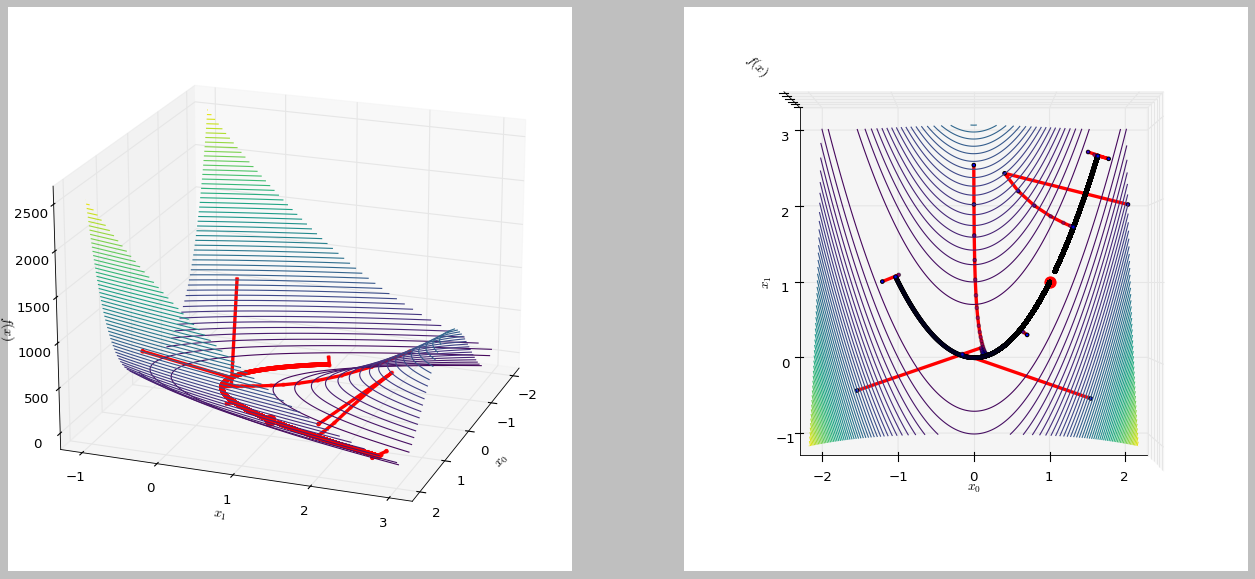

In [292]:
trajectories = []

for s_p in start_points:
    print(f"\nTasa de aprendizaje: {learning_rate}")
    final_point, trajectory = gradient_descent(rosenbrock, grad_rosenbrock, s_p, learning_rate=learning_rate)
    print(f"Punto final estimado: {final_point}")
    print(f"Valor de la función en el punto final: {rosenbrock(final_point[0], final_point[1])}")
    trajectories.append(trajectory)

# Graficar todas las trayectorias en dos subplots 3D
plot_multiple_trajectories_3d(trajectories, title="Trayectorias del Gradiente Descendente en la Función de Rosenbrock")

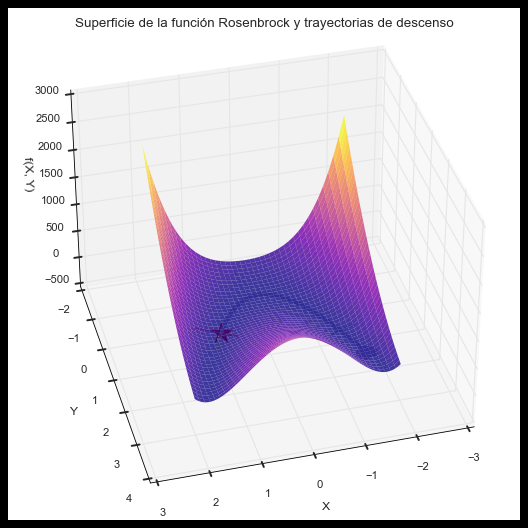

In [276]:
import numpy as np
import matplotlib.pyplot as plt

def gradient_descent_trajectory(f, grad_f, start, learning_rate, a=1, b=100, max_iter=10000, tol=1e-6):
    x = np.array(start, dtype=float)
    trajectory = [x.copy()]
    
    for _ in range(max_iter):
        grad = grad_f(x[0], x[1], a, b)
        x -= learning_rate * grad
        trajectory.append(x.copy())
        if np.linalg.norm(grad) < tol:
            break

    return np.array(trajectory)

starting_points = [(-1.5, 1.5), (0.5, 2.0), (-1.5, 2.5), (1.5, 1.0)]
trajectories = [
    gradient_descent_trajectory(rosenbrock, grad_rosenbrock, start, learning_rate=0.001)
    for start in starting_points
]

x = np.linspace(-2, 2, 400)
y = np.linspace(-1, 3, 400)
X, Y = np.meshgrid(x, y)
Z = rosenbrock(X, Y)

fig = plt.figure(figsize=(12, 8))
plt.style.use('seaborn-v0_8-white')

ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='plasma', alpha=0.8, edgecolor='none')

for trajectory in trajectories:
    ax.plot(
        trajectory[:, 0], 
        trajectory[:, 1], 
        rosenbrock(trajectory[:, 0], trajectory[:, 1]), marker="o", markersize=2, linewidth=1
    )

#ax.view_init(elev=40, azim=65) 
ax.view_init(elev=36, azim=75) 
plt.scatter([1], [1], color="red", marker='*', s=400, label="Mínimo")
    
ax.set_xlabel('X', labelpad=10)
ax.set_ylabel('Y', labelpad=10)
ax.set_zlabel('f(X, Y)', labelpad=10)
ax.set_title('Superficie de la función Rosenbrock y trayectorias de descenso', pad=20)

plt.show()


#### NEWTON:
1) Implementen el método de Newton, que utiliza el gradiente y la matriz Hessiana de f (x, y): xn+1 = xn − H−1(xn)∇f(xn)

    ##### ANÁLISIS:

    - Estudien cuál método converge más rápido al mínimo global, con qué orden de convergencia.